# 16. 프로젝트: 카메라 앱에 당황한 표정 효과를 적용해보기

## 루브릭

|평가문항|	상세기준|
|:-------|:-------|
|1. mean-shift를 활용하여 눈동자 검출 라벨링 추가작업을 원활히 진행하였다.|눈이미지-라벨이미지 쌍의 추가데이터셋을 10000건 이상 충분히 확보하였다.|
|2. 눈동자 키포인트 검출 딥러닝 모델이 구현되어 안정적으로 학습이 진행되었다.|pretrained model 기반의 딥러닝 모델의 트레이닝 loss가 안정적으로 감소함을 확인하였다.|
|3. 모델이 검출한 눈 위치에 당황한 표정효과 눈 이미지를 합성한 이미지를 생성하였다.|사람 얼굴 이미지에서 딥러닝 모델로 눈동자 키포인트를 검출하여 눈 이미지를 자연스럽게 합성한 결과이미지를 생성하였다.|

<img align='center' width='20%' src='https://aiffelstaticprd.blob.core.windows.net/media/original_images/gc-8-lecture-emoji.jpg'/>

## 0. 그림처럼 놀라서 눈이 튀어나오는 듯 한 효과를 내봅시다. 
- 우선 눈을 찾고, 눈에 효과를 적용해 보세요. 
- 어려워 보여도 차근차근 한다면 충분히 간단한 프로토타입을 구현하실 수 있습니다.

### 라벨링 툴 만들기

**OpenCV**의 **마우스 이벤트를 이용**해서 라벨링 툴(labeling tool)을 만들기:  
`keypoint_using_mouse.py`

우선 위 이미지를 다운받아, eye.png 이름으로 현재 프로젝트 폴더의 하위 디렉토리인 data 에 저장한 후, 아래 코드를 터미널에서 실행합니다.

`cd ~/aiffel/coarse_to_fine
 wget https://aiffelstaticprd.blob.core.windows.net/media/original_images/1_hZAciQ9.png -O ./data/eye.png
 python keypoint_using_mouse.py ./data/eye.png`

눈동자 지점을 마우스 왼쪽으로 클릭한 후 `s`를 눌러 저장하면 `esc`를 눌러 프로그램을 종료할 때   
`~/aiffel/coarse_to_fine/eye_annotation.json` 에 레이블이 저장됩니다.  


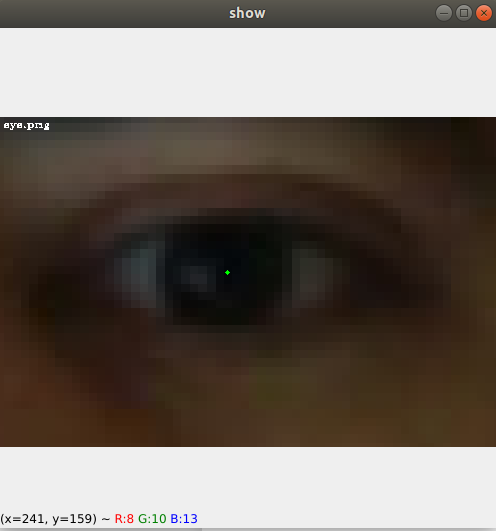

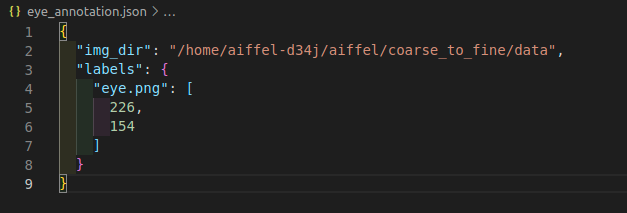

### 눈동자 검출

#### Mean-shift를 이용한 눈동자 검출:  
`eye_center_basic.py`

show_substep argument의 옵션을 True로 주게 되면 매 스텝의 작동을 차례차례 확인해볼 수 있습니다.  
`cd ~/aiffel/coarse_to_fine && python eye_center_basic.py True`

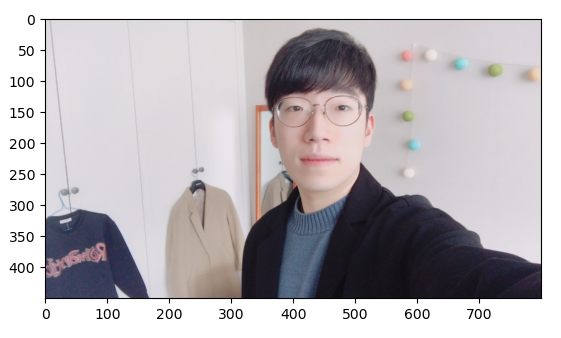

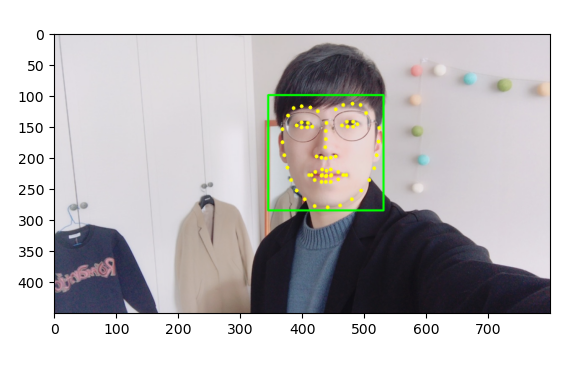

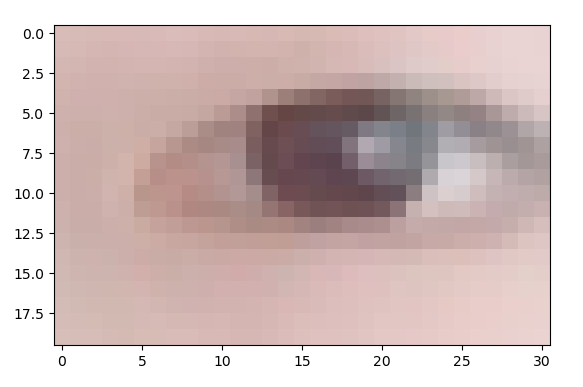

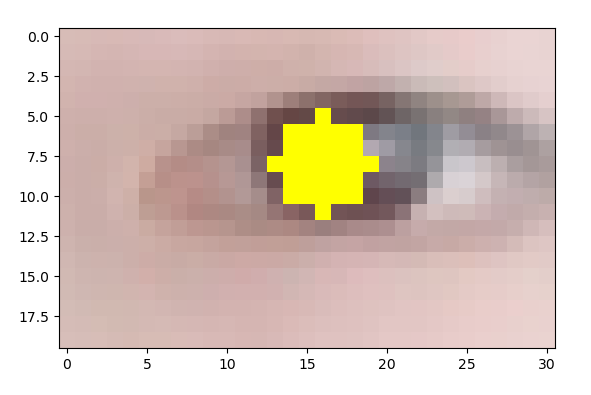

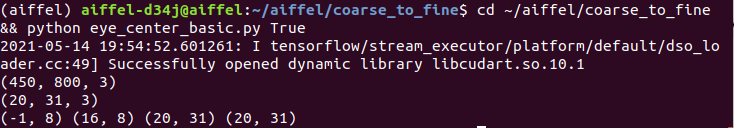

#### mean shift 알고리즘을 적용:  
`cd ~/aiffel/coarse_to_fine && python eye_center_meanshift.py`

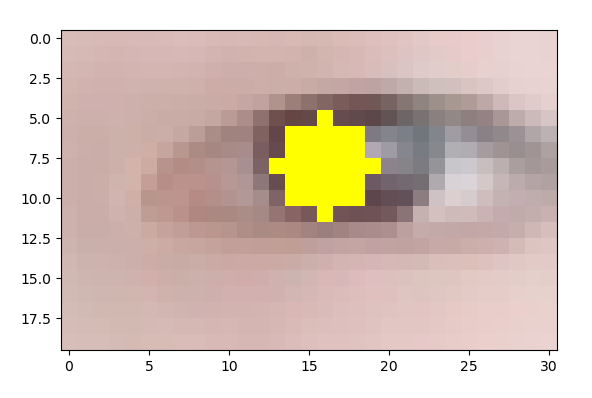


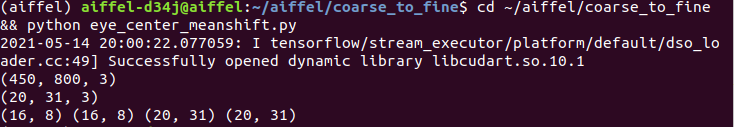

* **input image**  
img.shape  


* **눈 이미지 crop**  
img_left_eye.shape


* **눈동자 중심 좌표 출력**  
(left_center_x, left_center_y), (right_center_x, right_center_y), le_shape, re_shape



* [참고:Extended Labeled Faces in-the-Wild (ELFW): Augmenting Classes for Face Segmentation](https://multimedia-eurecat.github.io/2020/06/22/extended-faces-in-the-wild.html)

* [참고:ELFW github](https://github.com/multimedia-eurecat/ELFW)

* [참고:List of datasets for machine-learning research](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)

### 라벨 데이터 생성

* `HOME / lfw ` 폴더의 이미지에 대해


In [3]:
import os

path_dir = os.getenv("HOME") + '/lfw'
file_list = os.listdir(path_dir)
print(file_list[:10])

['Jerry_Rice', 'Ray_Liotta', 'Astrid_Betancourt', 'Ahmed_Chalabi', 'Mike_Maroth', 'Tara_VanDerveer', 'Eileen_Coparropa', 'Brian_Griese', 'Jorge_Marquez-Ruarte', 'Yory_Boy_Campas']


In [7]:
def search_dir(dirname):
    filenames = os.listdir(dirname)
    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        print (full_filename)
#     print (full_filename[:10])

        
search_dir(path_dir)

/home/aiffel-d34j/lfw/Jerry_Rice
/home/aiffel-d34j/lfw/Ray_Liotta
/home/aiffel-d34j/lfw/Astrid_Betancourt
/home/aiffel-d34j/lfw/Ahmed_Chalabi
/home/aiffel-d34j/lfw/Mike_Maroth
/home/aiffel-d34j/lfw/Tara_VanDerveer
/home/aiffel-d34j/lfw/Eileen_Coparropa
/home/aiffel-d34j/lfw/Brian_Griese
/home/aiffel-d34j/lfw/Jorge_Marquez-Ruarte
/home/aiffel-d34j/lfw/Yory_Boy_Campas
/home/aiffel-d34j/lfw/Garth_Drabinsky
/home/aiffel-d34j/lfw/Jean-Rene_Fourtou
/home/aiffel-d34j/lfw/Peter_Chan
/home/aiffel-d34j/lfw/Orrin_Hatch
/home/aiffel-d34j/lfw/Elena_Likhovtseva
/home/aiffel-d34j/lfw/Jim_Otto
/home/aiffel-d34j/lfw/Surya_Bahadur_Thapa
/home/aiffel-d34j/lfw/Scott_Weiland
/home/aiffel-d34j/lfw/Charlie_Deane
/home/aiffel-d34j/lfw/Tassos_Papadopoulos
/home/aiffel-d34j/lfw/John_Paul_II
/home/aiffel-d34j/lfw/Prince_Edward
/home/aiffel-d34j/lfw/Mohammed_Ashraf_Hafiz
/home/aiffel-d34j/lfw/Seymour_Cassell
/home/aiffel-d34j/lfw/Kelsey_Grammer
/home/aiffel-d34j/lfw/Christian_Von_Wernich
/home/aiffel-d34j/lfw/Den

/home/aiffel-d34j/lfw/Aaron_Pena
/home/aiffel-d34j/lfw/LeAnn_Rimes
/home/aiffel-d34j/lfw/Jason_Mewes
/home/aiffel-d34j/lfw/Gary_Coleman
/home/aiffel-d34j/lfw/Andrzej_Tyszkiewicz
/home/aiffel-d34j/lfw/Lino_Oviedo
/home/aiffel-d34j/lfw/Keith_Bishop_Jr
/home/aiffel-d34j/lfw/Matt_Braker
/home/aiffel-d34j/lfw/David_Chase
/home/aiffel-d34j/lfw/Jose_Carlo_Fernandez
/home/aiffel-d34j/lfw/Mukhtar_Alytnbayev
/home/aiffel-d34j/lfw/Gloria_Macapagal_Arroyo
/home/aiffel-d34j/lfw/Mike_Slive
/home/aiffel-d34j/lfw/Donna_Barrera
/home/aiffel-d34j/lfw/Serge_Klarsfeld
/home/aiffel-d34j/lfw/Caroline_Dhavernas
/home/aiffel-d34j/lfw/Esad_Landzo
/home/aiffel-d34j/lfw/Rodolfo_Abalos
/home/aiffel-d34j/lfw/Roger_King
/home/aiffel-d34j/lfw/Richard_Daley
/home/aiffel-d34j/lfw/Carolyn_Kuhl
/home/aiffel-d34j/lfw/Ali_Hammoud
/home/aiffel-d34j/lfw/Valentina_Cervi
/home/aiffel-d34j/lfw/Roger_Winter
/home/aiffel-d34j/lfw/Juan_Antonio_Samaranch
/home/aiffel-d34j/lfw/Ren_Qingjin
/home/aiffel-d34j/lfw/Gordon_Lightfoot
/hom

## 1. 이론 시간에 다룬 모델을 참고하여 딥러닝 모델을 설계해 봅시다.
7~9번 스텝에서 키포인트 검출을 위한 딥러닝 모델을 만들어본 바 있습니다.   
이를 활용해서 눈 이미지에서 적합한 키포인트를 찾는 딥러닝 모델을 구현해 봅시다.   
이 모델의 학습을 위해서는 오늘 다룬 것처럼 데이터를 모아 데이터셋을 구축하는 과정이 함께 진행되어야 할 것입니다.

### 데이터 확인

In [1]:
import tensorflow as tf
import numpy as np
import math
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.callbacks import LearningRateScheduler


TensorFlow Hub에서 제공하는 pretrained image feature embedding을 가지고 fine tuning을 해보겠습니다.

가지고 있는 데이터를 케라스 ImageDataGenerator 형식으로 읽습니다. 저는 라벨을 image 형태로 저장해 두었습니다.

In [2]:
import glob
import os

home_dir = os.getenv('HOME')+'/lfw'   # lfw : Labeled Faces in the Wild
list_image = sorted(glob.glob(home_dir+'/data/train/input/img/*.png'))
list_label = sorted(glob.glob(home_dir+'/data/train/label/mask/*.png'))
print (len(list_image), len(list_label))

# 32의 배수를 벗어나는 파일 경로들을 담은 list
list_image_out_of_range = list_image[len(list_image) - (len(list_image) % 32):]
list_label_out_of_range = list_label[len(list_label) - (len(list_label) % 32):]

# 해당 list가 존재한다면, 파일 삭제
if list_image_out_of_range:
    for path in list_image_out_of_range:
        os.remove(path)
if list_label_out_of_range:
    for path in list_label_out_of_range:
        os.remove(path)

IMAGE_SHAPE = (80, 120)
data_root = home_dir+'/data/train/input'
label_root = home_dir+'/data/train/label'

image_generator = tf.keras.preprocessing.image.ImageDataGenerator()
label_generator = tf.keras.preprocessing.image.ImageDataGenerator()
image_data = image_generator.flow_from_directory(str(data_root), class_mode=None, target_size=IMAGE_SHAPE, batch_size=32)
label_data = label_generator.flow_from_directory(str(label_root), class_mode=None, target_size=IMAGE_SHAPE, batch_size=32)


23712 23712
Found 23712 images belonging to 1 classes.
Found 23712 images belonging to 1 classes.


* `tf.keras.preprocessing.image.ImageDataGenerator()`:

* `image_generator.flow_from_directory()`:

In [3]:
# image_generator, label generator를 학습할 수 있는 입출력 형식으로 편집
def user_generation(train_generator, label_generator):
    h, w = train_generator.target_size
    for images, labels in zip(train_generator, label_generator):
        images /= 255.
        images = images[..., ::-1] # rgb to bgr

        list_point_labels = []
        for img, label in zip(images, labels):

            eye_ls = np.where(label==1) # leftside
            eye_rs = np.where(label==2) # rightside
            eye_center = np.where(label==3)

            lx, ly = [eye_ls[1].mean(), eye_ls[0].mean()]
            rx, ry = [eye_rs[1].mean(), eye_rs[0].mean()]
            cx, cy = [eye_center[1].mean(), eye_center[0].mean()]

            if len(eye_ls[0])==0 or len(eye_ls[1])==0:
                lx, ly = [0, 0]
            if len(eye_rs[0])==0 or len(eye_rs[1])==0:
                rx, ry = [w, h]
            if len(eye_center[0])==0 or len(eye_center[1])==0:
                cx, cy = [0, 0]

            np_point_label = np.array([lx/w,ly/h,rx/w,ry/h,cx/w,cy/h], dtype=np.float32)

            list_point_labels.append(np_point_label)
        np_point_labels = np.array(list_point_labels)
        yield (images, np_point_labels)

* 학습 라벨을 만들 때 3개의 점을 label 이미지에 표시했습니다.   
  - 눈의 왼쪽 끝점을 1의 값으로, 
  - 오른쪽 끝점은 2의 값으로, 
  - 가장 중요한 눈 중심(눈동자)는 3으로 인코딩 했습니다. 
  
* np.where() 함수로 이미지에서 좌표로 복원합니다.

In [4]:
# 만들어진 제너레이터로 데이터 포인트를 뽑아 관찰해 봅시다.
user_train_generator = user_generation(image_data, label_data)
for i in range(2):
    dd = next(user_train_generator)
    print (dd[0][0].shape, dd[1][0])

(80, 120, 3) [0.         0.         1.         1.         0.58038324 0.4672844 ]
(80, 120, 3) [0.         0.         1.         1.         0.04675572 0.46875   ]


/home/aiffel-d34j/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app
/home/aiffel-d34j/anaconda3/envs/aiffel/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/aiffel-d34j/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()


### 모델 설계

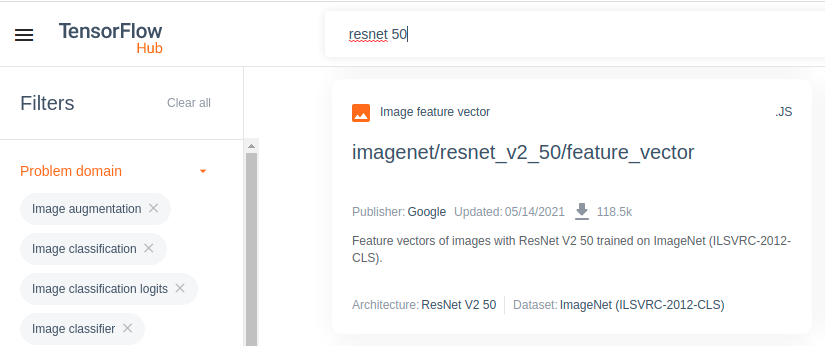

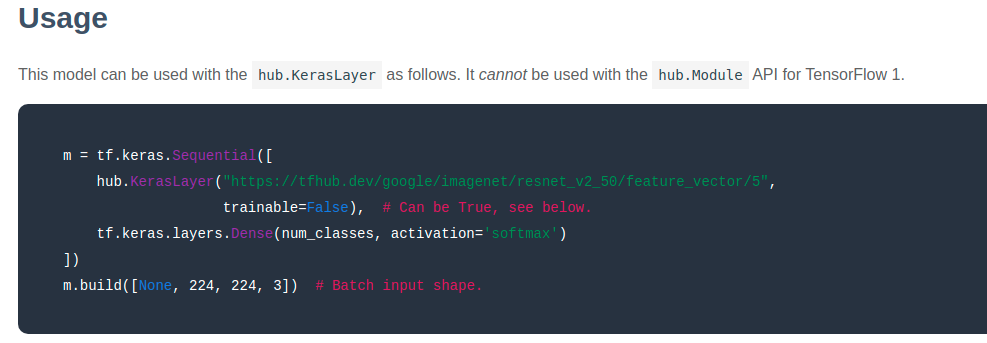

In [6]:
# TensorFlow Hub에서 ResNet의 특성추출기 부분을 백본(backbone)으로 사용
''' tf hub feature_extractor '''
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"    # 원하는 모델
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                            input_shape=(80,120,3))

image_batch = next(image_data)
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

num_classes = 6

feature_extractor_layer.trainable = False
model = tf.keras.Sequential([
    feature_extractor_layer,
    #layers.Dense(1024, activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(num_classes, activation='sigmoid'),
])

model.summary()

(32, 2048)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 2048)              23564800  
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 12294     
Total params: 23,577,094
Trainable params: 12,294
Non-trainable params: 23,564,800
_________________________________________________________________


In [7]:
# 모델 학습 설정
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='mse',
  metrics=['mae']
  )

In [8]:
# 학습률(learning rate)을 조절하는 함수
def lr_step_decay(epoch):
    init_lr = 0.0005       # self.flag.initial_learning_rate
    lr_decay = 0.5         # self.flag.learning_rate_decay_factor
    epoch_per_decay = 2    # self.flag.epoch_per_decay
    lrate = init_lr * math.pow(lr_decay, math.floor((1+epoch)/epoch_per_decay))
    return lrate

In [9]:
# 학습을 진행합니다.
steps_per_epoch = image_data.samples//image_data.batch_size
print (image_data.samples, image_data.batch_size, steps_per_epoch)
# 23712 32 741 -> 데이터를 batch_size(32) 의 배수로 맞춰 준비해 주세요. 

assert(image_data.samples % image_data.batch_size == 0)  # 데이터가 32의 배수가 되지 않으면 model.fit()에서 에러가 발생합니다.

learning_rate = LearningRateScheduler(lr_step_decay)

history = model.fit(user_train_generator, epochs=10,
                    steps_per_epoch=steps_per_epoch,
                    callbacks = [learning_rate]
                    )

23712 32 741
Epoch 1/10


/home/aiffel-d34j/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app
/home/aiffel-d34j/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()


741/741 [==============================] - 26s 32ms/step - loss: 0.0370 - mae: 0.0982
Epoch 2/10
741/741 [==============================] - 18s 24ms/step - loss: 0.0144 - mae: 0.0566
Epoch 3/10
741/741 [==============================] - 18s 24ms/step - loss: 0.0137 - mae: 0.0544
Epoch 4/10
741/741 [==============================] - 18s 24ms/step - loss: 0.0133 - mae: 0.0534
Epoch 5/10
741/741 [==============================] - 18s 24ms/step - loss: 0.0131 - mae: 0.0529
Epoch 6/10
741/741 [==============================] - 18s 25ms/step - loss: 0.0129 - mae: 0.0525
Epoch 7/10
741/741 [==============================] - 18s 24ms/step - loss: 0.0128 - mae: 0.0520
Epoch 8/10
741/741 [==============================] - 18s 24ms/step - loss: 0.0128 - mae: 0.0523
Epoch 9/10
741/741 [==============================] - 18s 24ms/step - loss: 0.0128 - mae: 0.0519
Epoch 10/10
741/741 [==============================] - 18s 24ms/step - loss: 0.0128 - mae: 0.0522


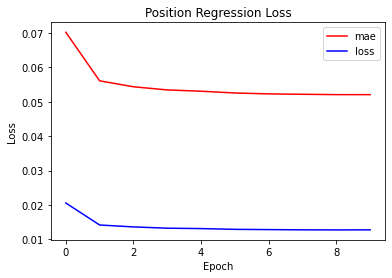

In [12]:
# 훈련 과정 loss 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], 'r')
plt.plot(history.history['loss'], 'b')
plt.title('Position Regression Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['mae', 'loss'], loc='upper right')
plt.show()

### 모델 평가

In [13]:
IMAGE_SHAPE = (80, 120)

home_dir = os.getenv('HOME')+'/lfw'

val_data_root = home_dir + '/data/val/input'
val_label_root = home_dir + '/data/val/label'

image_generator_val = tf.keras.preprocessing.image.ImageDataGenerator()
label_generator_val = tf.keras.preprocessing.image.ImageDataGenerator()

# 검증(validation)용 데이터는 섞어줄(shuffle) 필요가 없기 때문에 shuffle=False 옵션을 추가했습니다.
image_data_val = image_generator.flow_from_directory(str(val_data_root), class_mode=None, target_size=IMAGE_SHAPE, shuffle=False)
label_data_val = label_generator.flow_from_directory(str(val_label_root), class_mode=None, target_size=IMAGE_SHAPE, shuffle=False)

Found 2628 images belonging to 1 classes.
Found 2628 images belonging to 1 classes.


In [14]:
# 제너레이터를 만들고 evaluate_generator() 로 평가를 수행합니다.
user_val_generator = user_generation(image_data_val, label_data_val)
mse, mae = model.evaluate_generator(user_val_generator, image_data_val.n // 32)
print(mse, mae)

/home/aiffel-d34j/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/home/aiffel-d34j/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app
/home/aiffel-d34j/anaconda3/envs/aiffel/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/aiffel-d34j/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()


0.012890417128801346 0.052741918712854385


* `model.evaluate_generator(generator, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)` : [참고](https://keras.io/ko/models/sequential/)
  - 데이터 생성기에 대해서 모델을 평가합니다

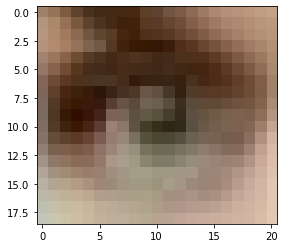

In [21]:
# 실제로 이미지에 출력
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(val_data_root+'/img/eye_000210_l.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [22]:
# 입력을 위해 이미지를 120x80 으로 resize 한 후, 배치(batch)를 나타낼 수 있는 4차원 텐서로 변경
np_inputs = np.expand_dims(cv2.resize(img, (120, 80)), axis=0)
preds = model.predict(np_inputs/255., 1)

repred = preds.reshape((1, 3, 2))
repred[:,:,0] *= 120
repred[:,:,1] *= 80
print (repred)

[[[2.9520306e-03 3.4388965e-03]
  [1.1999863e+02 7.9999359e+01]
  [4.9657848e+01 1.9507782e+01]]]


* 1행부터 좌측, 우측, 중앙 좌표를 나타냅니다.

[0. 0.]
[120.  80.]
[50. 20.]


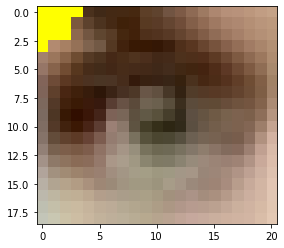

In [23]:
show = img.copy()
for pt in repred[0]:
    print (pt.round())
    # pt 값은 120x80 으로 뽑았는데 우리가 사용하는 데이터 크기는 60x40입니다.따라서 pt 에 0.5 를 곱해서 그림에 출력합니다.
    show = cv2.circle(show, tuple((pt*0.5).astype(int)), 3, (0,255,255), -1)

plt.imshow(cv2.cvtColor(show, cv2.COLOR_BGR2RGB))
plt.show()

## 2. 눈동자 효과를 추가해 봅시다.
추출된 눈 위치에 위의 당황한 표정의 눈 이미지를 합성해 봅시다.   
이렇게 합성된 이미지를 제출하는 것까지가 오늘 프로젝트 과제의 목표입니다.

## 회고

* lfw(Labeled Faces in the Wild) 이미지에 대한 라벨링이 잘 되지 않았다.
  - 